<a href="https://colab.research.google.com/github/DJCordhose/buch-machine-learning-notebooks/blob/master/kap7-iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kapitel 7: Neuronale Netzwerke - Grundlagen

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [5]:
import sklearn
print(sklearn.__version__)

1.2.2


In [6]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [7]:
import keras
print(keras.__version__)

2.12.0


In [8]:
import pandas as pd
print(pd.__version__)

1.5.3


## Iris mit Neuronalen Netzwerken

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

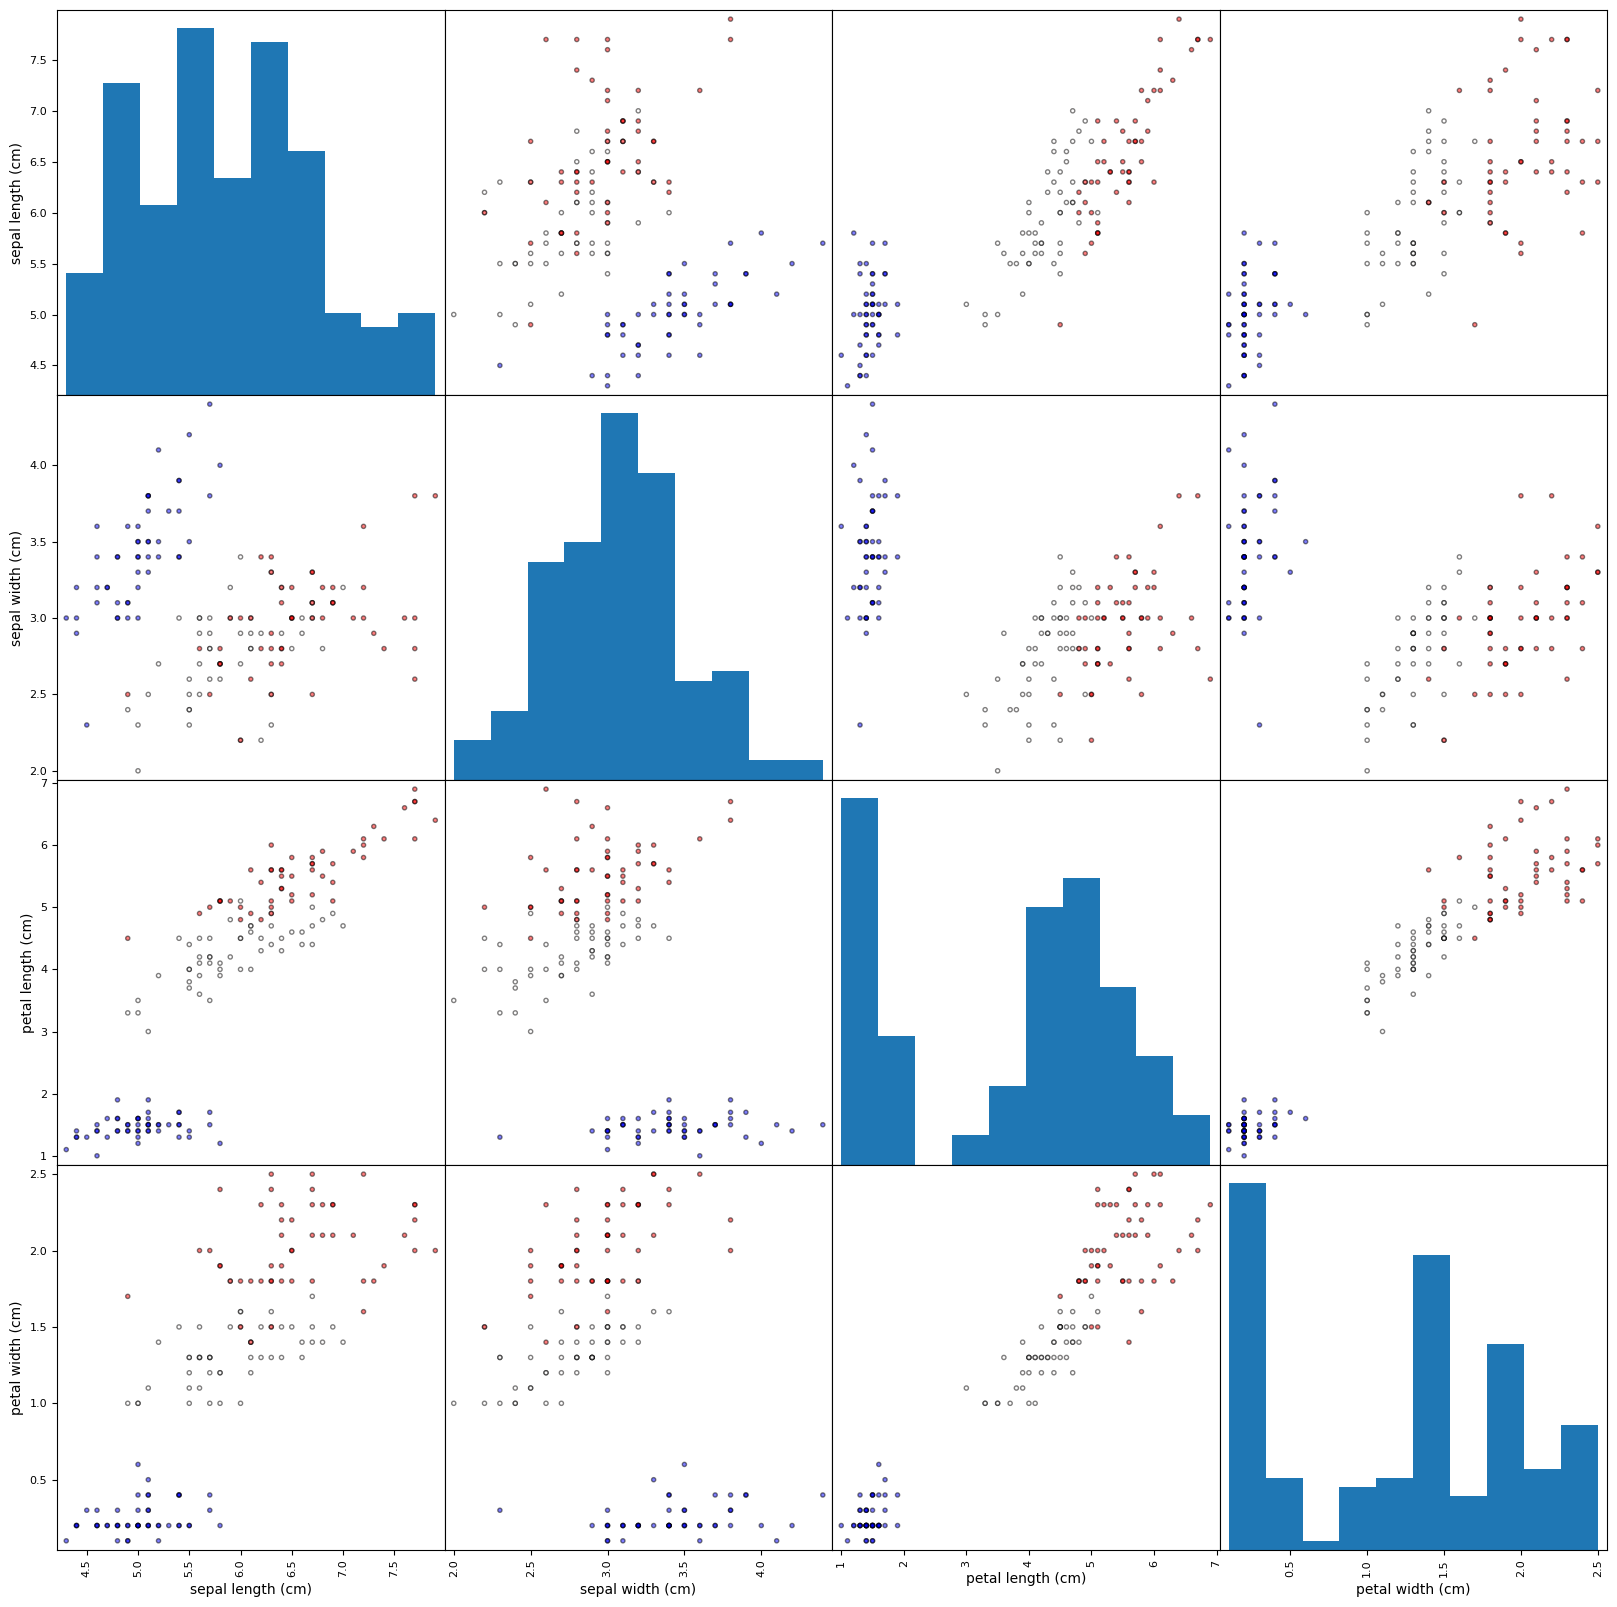

In [11]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolor='black', figsize=(20, 20))

In [12]:
# plt.savefig('ML_0701.png', bbox_inches='tight')

## Das künstliche Neuron

In [13]:
w0 = 3
w1 = -4
w2 = 2

def neuron_no_activation(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sum

In [14]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [15]:
neuron_no_activation(5.1, 3.5)

-10.399999999999999

### Activation Functions

In [16]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

#### Step Function: abrupter, nicht stetig differenzierbarer Übergang zwischen 0 und 1

In [17]:
def np_step(X):
    return 0.5 * (np.sign(X) + 1)

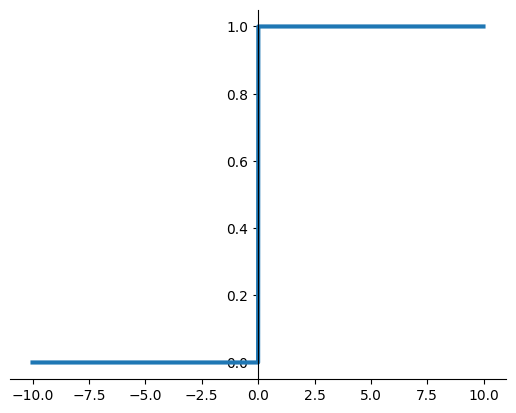

In [18]:
x = np.arange(-10,10,0.01)
y = np_step(x)

centerAxis()
plt.plot(x, y, lw=3)

#### Sigmoid Function: Fließender Übergang zwischen 0 und 1

In [19]:
def np_sigmoid(X):
    return 1 / (1 + np.exp(X * -1))

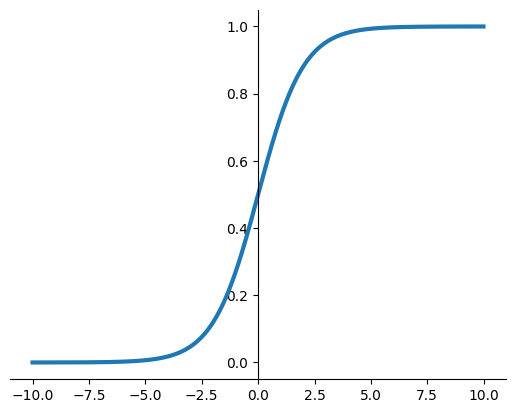

In [20]:
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Tangens Hyperbolicus Function: Fließender Übergang zwischen -1 und 1

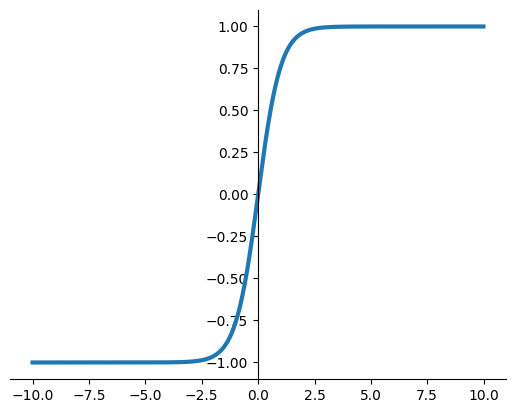

In [21]:
x = np.arange(-10,10,0.01)
y = np.tanh(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Relu: Einfach zu berechnen, setzt kompletten negativen Wertebereich auf 0

In [22]:
def np_relu(x):
    return np.maximum(0, x)

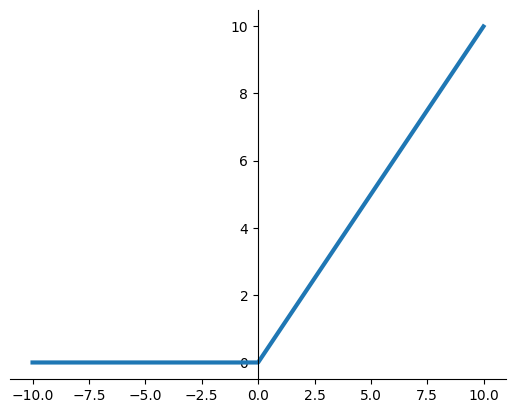

In [23]:
x = np.arange(-10,10,0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

In [24]:
# https://docs.python.org/3/library/math.html
import math as math
def sigmoid(x):
    return 1 / (1 + math.exp(x * -1))

w0 = 3
w1 = -4
w2 = 2

def neuron(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sigmoid(sum)

In [25]:
neuron(5.1, 3.5)

3.043155690056538e-05

In [26]:
# Version that takes as many values as you like
weights_with_bias = np.array([3, -4, 2])
def np_neuron(X):
    inputs_with_1_for_bias = np.concatenate((np.array([1]), X))
    return np_sigmoid(np.sum(inputs_with_1_for_bias*weights_with_bias));

In [27]:
np_neuron(np.array([5.1, 3.5]))

3.043155690056538e-05

## Unser erste Neuronales Netz mit Keras

In [28]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [29]:
from keras.layers import Dense
fc = Dense(3)(inputs)

In [30]:
from keras.models import Model
model = Model(inputs=inputs, outputs=fc)

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

1/1 [==============================] - 0s 384ms/step


array([[-4.934084 ,  0.543613 , -1.8231183]], dtype=float32)

In [34]:
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(inputs=inputs, outputs=predictions)

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

1/1 [==============================] - 0s 134ms/step


array([[0.32990545, 0.13918178, 0.53091276]], dtype=float32)

# Training

In [38]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [39]:
y[100]

2

In [40]:
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [41]:
y[100]

array([0., 0., 1.], dtype=float32)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [44]:
# !rm -r tf_log

# https://keras.io/callbacks/#tensorboard
# tb_callback = keras.callbacks.TensorBoard(log_dir='./tf_log')
# To start tensorboard
# tensorboard --logdir=/mnt/c/Users/olive/Development/ml/tf_log
# open http://localhost:6006

In [45]:
# %time model.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[tb_callback])
%time model.fit(X_train, y_train, epochs=500, validation_split=0.3)

Epoch 1/500
3/3 [==============================] - 2s 249ms/step - loss: 1.0869 - accuracy: 0.3690 - val_loss: 1.1778 - val_accuracy: 0.3333
Epoch 2/500
3/3 [==============================] - 0s 34ms/step - loss: 1.0466 - accuracy: 0.3810 - val_loss: 1.1360 - val_accuracy: 0.3611
Epoch 3/500
3/3 [==============================] - 0s 38ms/step - loss: 1.0098 - accuracy: 0.4167 - val_loss: 1.0969 - val_accuracy: 0.3611
Epoch 4/500
3/3 [==============================] - 0s 40ms/step - loss: 0.9763 - accuracy: 0.4286 - val_loss: 1.0604 - val_accuracy: 0.3611
Epoch 5/500
3/3 [==============================] - 0s 60ms/step - loss: 0.9463 - accuracy: 0.5000 - val_loss: 1.0267 - val_accuracy: 0.4444
Epoch 6/500
3/3 [==============================] - 0s 34ms/step - loss: 0.9175 - accuracy: 0.5238 - val_loss: 0.9962 - val_accuracy: 0.4444
Epoch 7/500
3/3 [==============================] - 0s 42ms/step - loss: 0.8929 - accuracy: 0.5833 - val_loss: 0.9685 - val_accuracy: 0.5000
Epoch 8/500
3/3 [==

# Bewertung

In [46]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

1/1 [==============================] - 0s 25ms/step


array([[9.88026619e-01, 1.19650345e-02, 8.30476074e-06]], dtype=float32)

In [47]:
X[0], y[0]

(array([5.1, 3.5, 1.4, 0.2]), array([1., 0., 0.], dtype=float32))

In [48]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

4/4 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.9667


(0.2582014799118042, 0.9666666388511658)

In [49]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

1/1 [==============================] - 0s 28ms/step - loss: 0.2390 - accuracy: 0.9333


(0.23902304470539093, 0.9333333373069763)